1. Zip the folder containing images and upload it to My Drive/Colab Notebooks/projects
2. Follow the steps below



Conneting Colab with drive


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Enter the folder name


In [15]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/Barcode and Partial/Dataset" "/content"

# Install detectron2

In [3]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=5f7d1073826f158e210c7a133d3a46ec3ca053d06787f5417b1a9bfaf8496c00
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.4 MB/s eta 0:13:55tcmalloc: large alloc 1147494400 bytes == 0x39b2a000 @  0x7f0aaeda2615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-tuafvj2g
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-tuafvj2g
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264330 sha256=be2d28931b48d1690ba5485d46efbb9102a0bcf408f63d9b7988f661f6ee591f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xlinl7ij/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6+cu111 requires pycocotools>=2.0.2, but you have pycocotools 2.0 which is incompatible.
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.

In [1]:

# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
!pip install imantics

  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16033 sha256=7761e7c65f91f6c62001130a9a88bf79c1d19a84fc9aab277c2f0846de9dcddb
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


Uploding pickle file there will be 2 pickle folder table_full_data.pkl and  table_use_weight.pkl, full data is the metadata file for weights which are trained from scratch and used_weight is the metadata for model which is trained using previous weights

In [2]:
import pickle
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/MRCNN Barcode   No barcode/table_full_data (2).pkl","rb")       # Pickle Path 
example_dict = pickle.load(pickle_in)
print(example_dict)


Metadata(name='table_train', thing_classes=['barcode', 'nobarcode'])


In [27]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #model used
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8 # set threshold for this model
path2 = "/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/MRCNN Barcode   No barcode/model_final (3).pth"
cfg.MODEL.WEIGHTS = path2 #give weight file path
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(example_dict.thing_classes)
#cfg.DATASETS.TEST = ("ct1_test", )
predictor = DefaultPredictor(cfg)

#In os.listdir give the image path 
import os
#dataset_dicts = os.listdir("/content/drive/My Drive/Colab Notebooks/projects/%s.zip (Unzipped Files)/%s"%(fol, fol))

PATH = "/content/Dataset/train"            # Image Directory Path 

dataset_dicts = os.listdir(PATH)

This is the part where predictions happen

IMG_20220303_173853.jpg 0
IMG_20220303_173611.jpg 1
IMG_20220303_175627.jpg 2
IMG_20220303_175451.jpg 3
IMG_20220303_175317.jpg 4
IMG_20220303_174953.jpg 5
IMG_20220303_175324.jpg 6
IMG_20220303_173846.jpg 7
IMG_20220303_175539.jpg 8
IMG_20220303_174028.jpg 9
IMG_20220303_174744.jpg 10
IMG_20220303_174238.jpg 11
IMG_20220303_175557.jpg 12
Total runtime of the program is 22.19506335258484


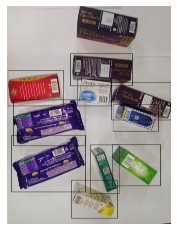

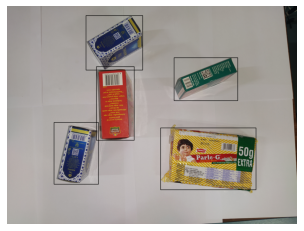

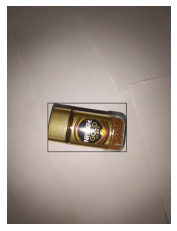

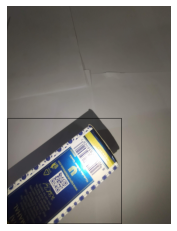

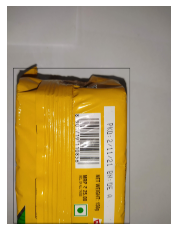

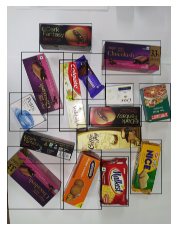

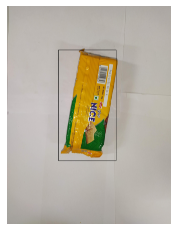

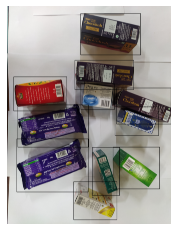

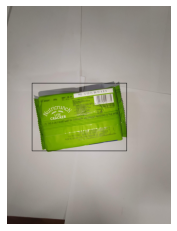

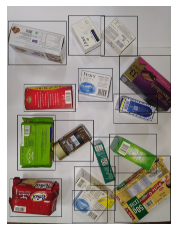

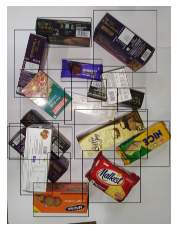

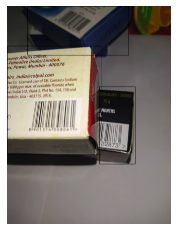

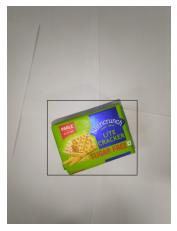

In [28]:
from detectron2.utils.visualizer import ColorMode
import cv2
import random
from google.colab.patches import cv2_imshow
import pandas as pd
from imantics import Polygons, Mask
import numpy as np 
import time
import matplotlib.pyplot as plt
%matplotlib inline


path = PATH #Give the image path
idx = 0
csv_data = []
j = 0
dic_list = pd.DataFrame(columns = ['file_name', 'boxes', 'score', 'class', 'poly_box','rect']) #if you dont want polygon coordinates remove poly_box and rect from the dataframe
begin = time.time()
for d in random.sample(dataset_dicts, len(dataset_dicts)):  
    if d.lower().endswith(('.png', '.jpg', '.jpeg')):
      im = cv2.imread(path+"/"+d)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      outputs = predictor(im) #model predictions
      #convert the predicted output to list for the dataframe
      bla = []
      print(f'{d} {j}')
      j = j + 1
      #print(outputs["instances"].pred_boxes.to("cpu"))
      instances = outputs["instances"].to("cpu")
      #print(len(instances.pred_boxes.tensor.cpu().numpy()))

      #new approach as of 30.10.2020
      for i in range(len(instances.pred_boxes.tensor.cpu().numpy())):
            score = int(instances.scores.numpy().tolist()[i] * 100)
            if score > 80:
                x1 = int(instances.pred_boxes.tensor.cpu().numpy()[i][0])
                y1 = int(instances.pred_boxes.tensor.cpu().numpy()[i][1])
                x2 = int(instances.pred_boxes.tensor.cpu().numpy()[i][2])
                y2 = int(instances.pred_boxes.tensor.cpu().numpy()[i][3])
                
                _class = instances.pred_classes.numpy().tolist()[i]
                poly = list(Mask(instances.pred_masks[i]).polygons()[0])
                csv_data.append([d, _class, x1, y1, x2, y2, '', score, poly])
                if _class == 1:
                  color = (0,0,0)
                  im = cv2.rectangle(im,(x1,y1),(x2,y2),color,5)
                else:
                  color = (0,0,0)
                  im = cv2.rectangle(im,(x1,y1),(x2,y2),color,5)

      plt.figure()
      plt.axis('off')
      plt.imshow(im)
      plt.imsave("/content/testOutput/"+d,im) 
time.sleep(1)
# store end time
end = time.time()
print(f"Total runtime of the program is {end - begin}")       

# assert False
#exporting csv
df_new = pd.DataFrame(csv_data,columns=['filename','class','x1','y1','x2','y2','extr_parameter','conf', 'poly'])
df_new.to_csv(r'/content/Mask_detectron2_TableDetection_R50_Inverted_DEXINED_Chiloquin.csv', index=False) #path to folder + 'filename.csv


In [10]:
!mkdir testOutput

mkdir: cannot create directory ‘testOutput’: File exists


In [29]:
!zip -r "/content/testOutput.zip" "/content/testOutput"

updating: content/testOutput/ (stored 0%)
updating: content/testOutput/IMG20220501093633.jpg (deflated 8%)
updating: content/testOutput/IMG_20220303_174028.jpg (deflated 6%)
updating: content/testOutput/IMG_20220303_174953.jpg (deflated 4%)
updating: content/testOutput/IMG_20220303_175451.jpg (deflated 25%)
updating: content/testOutput/IMG20220501094520.jpg (deflated 6%)
updating: content/testOutput/IMG20220501093600.jpg (deflated 8%)
updating: content/testOutput/IMG20220428083851.jpg (deflated 5%)
updating: content/testOutput/IMG_20220303_173846.jpg (deflated 2%)
updating: content/testOutput/IMG_20220428_083830.jpg (deflated 4%)
updating: content/testOutput/IMG20220502144406.jpg (deflated 7%)
updating: content/testOutput/IMG_20220303_175557.jpg (deflated 32%)
updating: content/testOutput/IMG_20220303_175324.jpg (deflated 21%)
updating: content/testOutput/IMG_20220502_144529.jpg (deflated 6%)
updating: content/testOutput/IMG20220501094604.jpg (deflated 5%)
updating: content/testOutput/